<a href="https://colab.research.google.com/github/BitKnitting/FitHome_Analysis/blob/master/notebooks/Entertainment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entertainment
This notebook figures out how much electricity is leaked through the plug servicing a home's entertainment area.  

It is common for a home to have a place - typically a living room - where there might be a TV, DVD Player, game console, audio equipment, and other entertainment devices plugged in.  These devices are usually used for a short period during the day. However, they are left plugged in.

Entertainment devices love to leak electricity.

We inserted a TP-LINK smart plug between the wall socket and the power cord that provides power to the devices.


In [0]:
import pandas as pd

# Data Directly from Firebase
We use a curl command to grab the readings in Firebase.  We then get the readings into a suitable Pandas dataframe for analysis.

In [5]:
%%time
!curl 'https://fithome-9ebbd.firebaseio.com/flower-09282019/device_readings/Entertainment.json?print=pretty' > entertainment.json  
df_needs_reshape = pd.read_json("entertainment.json","r", encoding="utf8")
df_reshaped = df_needs_reshape.T
# The datetime is in UTC time.  We are in the US/Pacific timezone.
df_reshaped.index = df_reshaped.index.tz_localize('UTC').tz_convert('US/Pacific')
display(df_reshaped.head())
# @title Start Date and End Data of Series
print('Start date: {}'.format(df_reshaped.index.min()))
print('End   date: {}'.format(df_reshaped.index.max()))
time_between = df_reshaped.index.max() - df_reshaped.index.min()
print('\n\nElapsed time: {}'.format(time_between))



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.8M  100 11.8M    0     0  13.7M      0 --:--:-- --:--:-- --:--:-- 13.7M


I          P
2019-10-18 08:46:38-07:00  0.507347  36.793682
2019-10-18 08:46:39-07:00  0.507347  36.793682
2019-10-18 08:46:40-07:00  0.507347  36.793682
2019-10-18 08:46:41-07:00  0.507347  36.793682
2019-10-18 08:46:42-07:00  0.510346  36.918450

Start date: 2019-10-18 08:46:38-07:00
End   date: 2019-10-20 15:59:07-07:00


Elapsed time: 2 days 07:12:29


FileNotFoundError: ignored

# Save the Data
We will save the data locally so we can use it offline.  The columns will be the date, current reading, power reading.  We're not saving the header.

# Read Local Data
If we're not connected to the net, we can still analyze a dataset.  When we load the local dataset, we want the date column to be our datetime index.

In [0]:
df_reshaped = pd.read_csv('data/entertainment.csv',names=['date','I','P'])
df_reshaped['datetime'] = pd.to_datetime(df_reshaped['date'])
df_reshaped = df_reshaped.set_index('datetime')
df_reshaped.drop(['date'],axis=1,inplace=True)
df_reshaped.head()

I          P
datetime                                      
2019-10-18 08:46:38-07:00  0.507347  36.793682
2019-10-18 08:46:39-07:00  0.507347  36.793682
2019-10-18 08:46:40-07:00  0.507347  36.793682
2019-10-18 08:46:41-07:00  0.507347  36.793682
2019-10-18 08:46:42-07:00  0.510346  36.918450

# Describe the Data
Let's look at some interesting stats

In [6]:
# @title Interesting Data Stats
df_reshaped.describe()

I              P
count  194452.000000  194452.000000
mean        1.002059     100.364485
std         0.650429      86.626965
min         0.236490      15.870870
25%         0.520230      37.948846
50%         0.620445      44.734359
75%         1.520783     173.383322
max         2.872172     338.371207

In [0]:
import plotly.graph_objects as go

In [8]:
# @title Interactive Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_reshaped.index,y=df_reshaped['P'],name='Power',line_color='deepskyblue'))
fig.update_layout(title_text='Power Readings',
                  xaxis_rangeslider_visible=True)
fig.show()

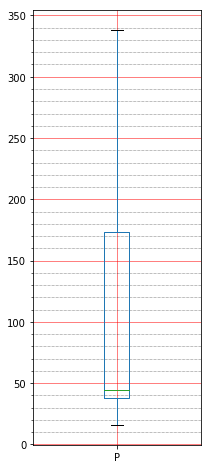

In [9]:
# @title Box Plot
ax = df_reshaped['P'].plot.box(figsize=(3,8))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

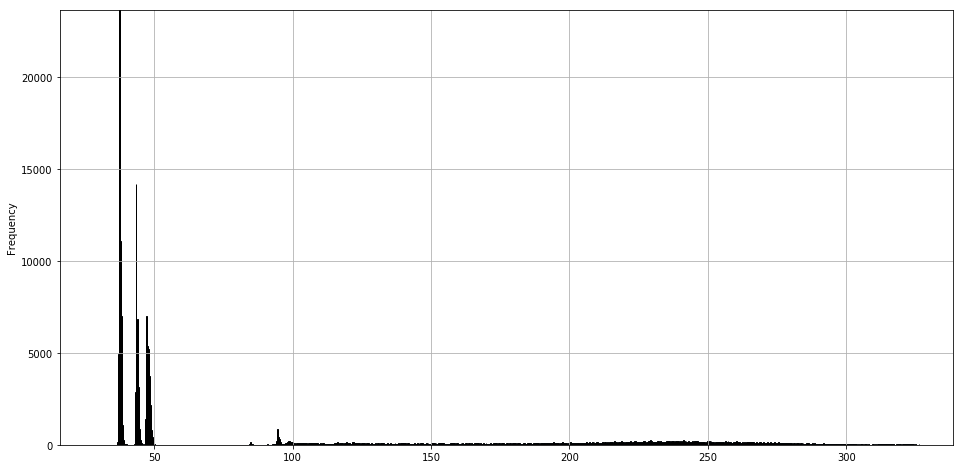

In [10]:
 # @title Histogram Distribution
 df_reshaped['P'].plot.hist(bins=1000, grid=True, edgecolor='k',figsize=(16,8)).autoscale(enable=True, axis='both', tight=True)


In [11]:
# @title Determine amount Leaking
df_bins = df_reshaped['P'].value_counts(bins=1000)

left_bin = df_bins.index[0].left
right_bin = df_bins.index[0].right

amount_leaking = int(round((right_bin + left_bin) / 2))
print('Amount of leakage: {}w\n'.format(amount_leaking))
print('Highest Frequency bins: \n{}'.format(df_bins.head(10)))

Amount of leakage: 37w

Highest Frequency bins: 
(37.156, 37.478]    23643
(37.478, 37.801]    15211
(43.283, 43.606]    14155
(37.801, 38.123]    11099
(38.123, 38.446]     7010
(47.153, 47.476]     7002
(43.928, 44.251]     6860
(43.606, 43.928]     6153
(47.476, 47.798]     5394
(47.798, 48.121]     5230
Name: P, dtype: int64


# Percentage of Leakage
We previously determined the amount of total leakage for this home to be 166w.  What is the percentage of leakage coming from the Entertainment area?

In [16]:
entertainment_leakage = round(37/161*100,2)
print('**********\nThe percentage of leakage from the entertainment area is {}%\n**********'.format(entertainment_leakage))

**********
The percentage of leakage from the entertainment area is 22.98%
**********
